# ML Controller

This notebook is dedicated to training a Machine Learning controller. 

In [7]:
# Imports
import os 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# Generating the training dataset
directory_name = "data/"

data_files = [file for file in os.listdir(directory_name)]
dataframes = [pd.read_csv(os.path.join(directory_name, file)) for file in data_files]
merged_df = pd.concat(dataframes, ignore_index=True)

merged_df.to_csv('train.csv')

In [3]:
# Load the dataset
data_file = "train.csv"
data_df = pd.read_csv(data_file)
print(data_df.head())

   Unnamed: 0    t       vEgo      aEgo      roll  targetLateralAcceleration  \
0           0  0.0  27.977423 -0.095678  0.028542                  -0.009163   
1           1  0.1  27.975434 -0.042674  0.028763                  -0.009643   
2           2  0.2  27.994873  0.091997  0.028983                  -0.006962   
3           3  0.3  27.986866  0.010199  0.029203                  -0.005890   
4           4  0.4  27.972751 -0.130246  0.029264                  -0.015121   

   steerCommand  
0      0.192615  
1      0.194132  
2      0.193756  
3      0.194411  
4      0.200080  


In [4]:
# Data wrangling
clean_df = data_df.copy()

clean_df = clean_df.dropna()
print(f"Length of original dataset: {len(data_df)}")
print(f"Length of cleaned dataset: {len(clean_df)}")


Length of original dataset: 11988342
Length of cleaned dataset: 2000000


In [ ]:
# Generating current lateral acceleration column 
clean_df['current_lataccel'] = clean_df['targetLateralAcceleration'].shift(1) # Not sure this is right
clean_df = clean_df.dropna()

In [29]:
# Multivariable Linear Regression 

X = clean_df[['current_lataccel', 'targetLateralAcceleration', 'roll', 'aEgo', 'vEgo']]
Y = clean_df['steerCommand']

model = LinearRegression()
model.fit(X, Y)

clean_df['steer_pred'] = model.predict(X)

print("Intercept:", model.intercept_)
print("Coefficient Current Lateral Acceleration:", model.coef_[0])
print("Coefficient Target Lateral Acceleration:", model.coef_[1])
print("Coefficient Roll:", model.coef_[2])
print("Coefficient Acceleration:", model.coef_[3])
print("Coefficient Velocity:", model.coef_[4])
clean_df.head()

Intercept: 0.04929178265049712
Coefficient Current Lateral Acceleration: -0.20526570383335027
Coefficient Target Lateral Acceleration: -0.23571886005847412
Coefficient Roll: 4.800953452749783
Coefficient Acceleration: 0.0014250706050150564
Coefficient Velocity: -0.0013999300865239553


/var/folders/mn/zxjr_wy90wjd_mx964yq9_zh0000gp/T/ipykernel_18457/100749313.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['steer_pred'] = model.predict(X)


,Unnamed: 0,t,vEgo,aEgo,roll,targetLateralAcceleration,steerCommand,current_lataccel,steer_pred,Residuals
1,1,0.1,27.975434,-0.042674,0.028763,-0.009643,0.194132,-0.009163,0.152309,0.041823
2,2,0.2,27.994873,0.091997,0.028983,-0.006962,0.193756,-0.009643,0.152998,0.040758
3,3,0.3,27.986866,0.010199,0.029203,-0.005890,0.194411,-0.006962,0.153148,0.041263
4,4,0.4,27.972751,-0.130246,0.029264,-0.015121,0.200080,-0.005890,0.155216,0.044863
5,5,0.5,27.978557,0.022151,0.028876,-0.017595,0.199294,-0.015121,0.156039,0.043255


/var/folders/mn/zxjr_wy90wjd_mx964yq9_zh0000gp/T/ipykernel_18457/3641175149.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Residuals'] = clean_df['steerCommand'] - clean_df['steer_pred']
/var/folders/mn/zxjr_wy90wjd_mx964yq9_zh0000gp/T/ipykernel_18457/3641175149.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=model.coef_, palette="coolwarm")


Intercept: 0.04929178265049712
Coefficient current_lataccel: -0.2053
Coefficient targetLateralAcceleration: -0.2357
Coefficient roll: 4.8010
Coefficient aEgo: 0.0014
Coefficient vEgo: -0.0014

R² Score: 0.6851
RMSE: 0.1448


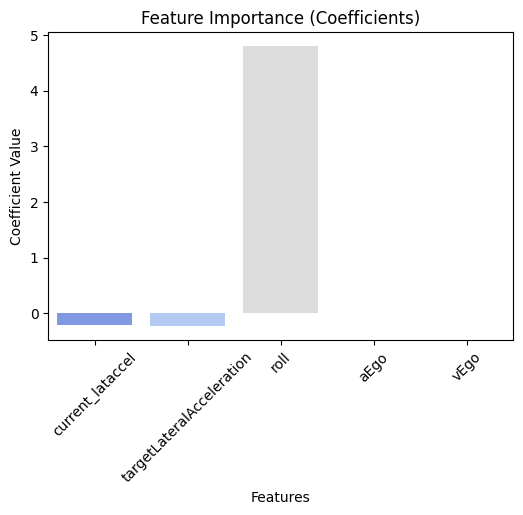

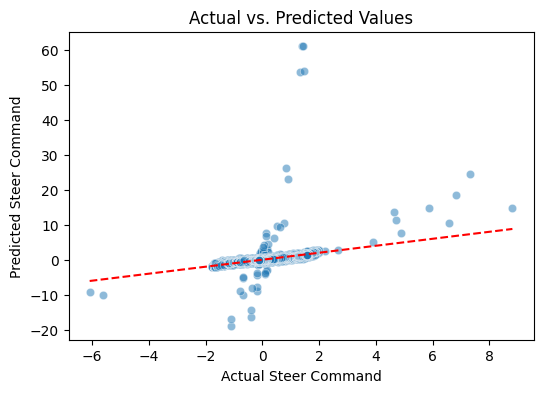

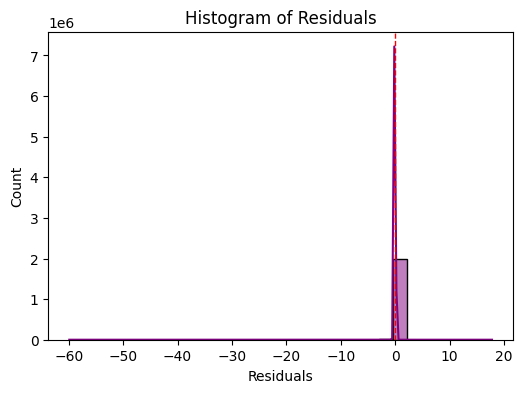

In [25]:
# Evaluate model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Evaluation Metrics
clean_df['Residuals'] = clean_df['steerCommand'] - clean_df['steer_pred']
r2 = r2_score(Y, clean_df['steer_pred'])  # R² score
rmse = np.sqrt(mean_squared_error(Y, clean_df['steer_pred']))  # Root Mean Squared Error

# Print Model Parameters
print("Intercept:", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficient {feature}: {coef:.4f}")

print(f"\nR² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# --- PLOTTING ---

# 1️⃣ Feature Importance (Coefficient Magnitudes)
plt.figure(figsize=(6, 4))
sns.barplot(x=X.columns, y=model.coef_, palette="coolwarm")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Coefficients)")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Actual vs. Predicted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=clean_df['steerCommand'], y=clean_df['steer_pred'], alpha=0.5)
plt.plot([clean_df['steerCommand'].min(), clean_df['steerCommand'].max()], 
         [clean_df['steerCommand'].min(), clean_df['steerCommand'].max()], 
         color="red", linestyle="--")  # 1:1 reference line
plt.xlabel("Actual Steer Command")
plt.ylabel("Predicted Steer Command")
plt.title("Actual vs. Predicted Values")
plt.show()

# 3️⃣ Residual Plot
plt.figure(figsize=(6, 4))
sns.histplot(clean_df['Residuals'], bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Reference line at 0
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

In [26]:
import pickle

# Save the model
with open("l_reg.pkl", "wb") as f:
    pickle.dump(model, f)
print("Model saved successfully!")


Model saved successfully!
